# DDMax Playground

This is an in-browser playground to explore `ddmax()`

## Original algorithm
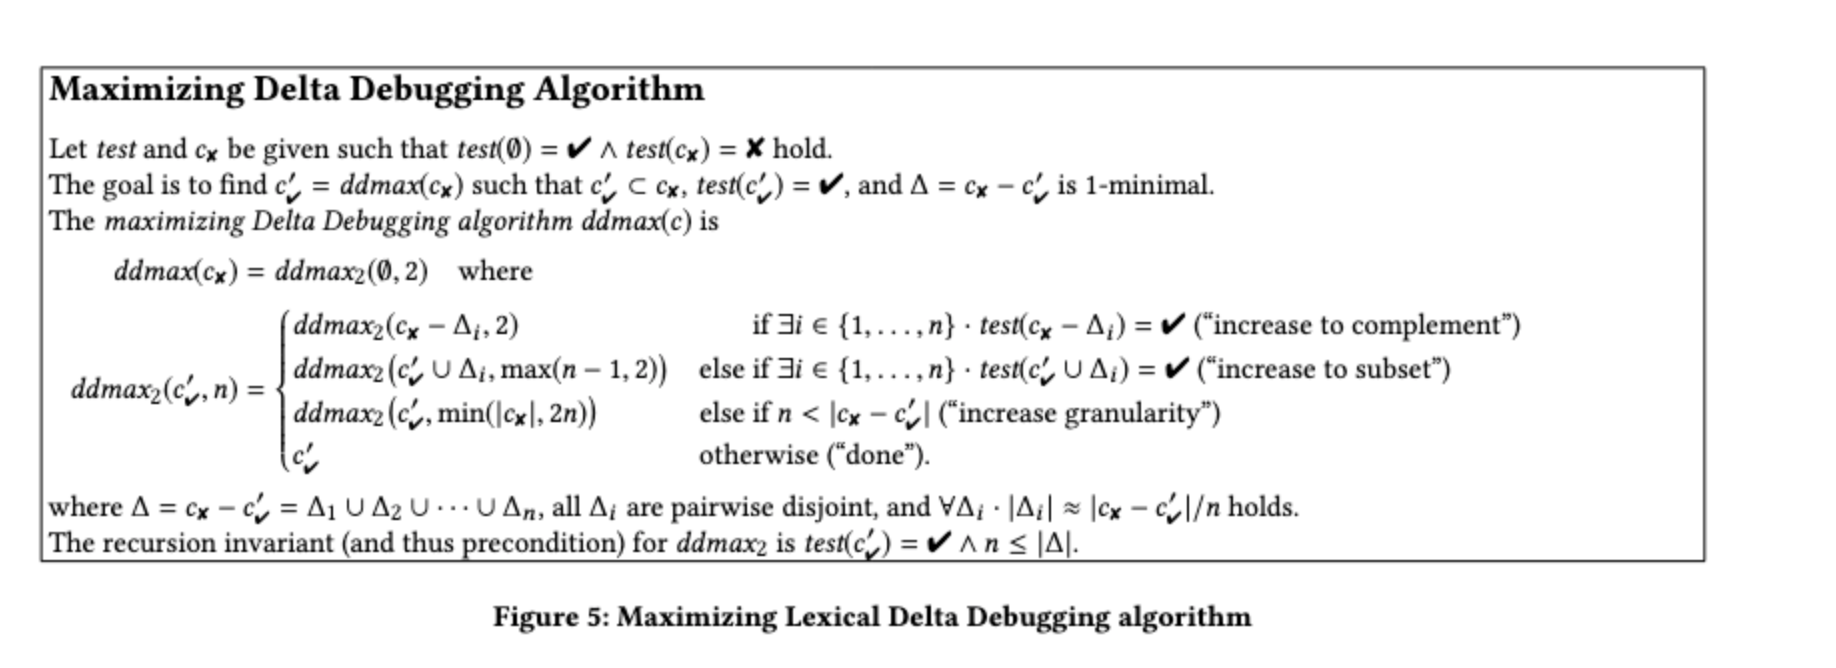

## Set primitives 
We first define a few primitives for set operations.

In [1]:
def minus(first, second):
    return [i for i in first if i not in second]

def union(first, second):
    return list(sorted(first + second))

def intersect(first, second):
    return [i for i in first if i in second]

## DDMax

We have two global that represent the complete input string and its indexes -- $C_x$ (`CX_I`).

In [2]:
CX_S = None
CX_I = None

Now, from Figure 5 in $\text{ddmax}(C_x)$ is simply defined as calling $\text{ddmax}_2(\emptyset, 2)$. So we define it that way.

In [3]:
def ddmax(cx):
    global CX_S, CX_I
    CX_S = list(cx)
    CX_I = list(range(len(cx)))
    empty_idxs = []
    sol_idxs = ddmax2(empty_idxs, 2)
    return ''.join([s for i,s in enumerate(CX_S) if i in sol_idxs] )

## DDMax2

From Figure 5, we first compute $\delta = C_x - C'_\checkmark$. Here, $C_x$ (`CX_I`) contains the indexes of the original input string, $C'_\checkmark$ (`cprime_y`) contains the indexs of passing chars. Initially empty when $n = 2$
 `cprime_y` is subset of `cx` such that `test(cprime_y)` succeeds, and `delta = cx-cprime_y` is *1-minimal*.


In [4]:
def ddmax2(cprime_y, n):
    print('ddmax2: %s %d' %(repr(to_str(cprime_y)), n))
    CX_minus_cprime_y = minus(CX_I, cprime_y)
    # Fig 5: where delta = CX - c'y
    delta = CX_minus_cprime_y

    # Fig 5: recursion invariant for ddmax2 is test(cprime_y) and n <= len(delta)
    assert n <= len(delta), 'Constraint violation I'

    # Fig 5: For all delta_n[i] len(delta_n[i]) ~ (len(delta)/n) holds
    # split delta to n parts giving us delta_i == delta_n[i]
    # Fig 5: all delta_n[i] are pairwise disjoint
    delta_n = split_idxs(delta, n)
    # strs_n = [to_str(d) for d in delta_n]

    CX_minus_delta_i =  increase_to_complement(delta_n)
    if CX_minus_delta_i:
        #if \exist i \in {1..n} such that test(c_x - delta_i) holds
        return ddmax2(CX_minus_delta_i, 2)

    cprime_y_union_delta_i = increase_to_subset(delta_n, cprime_y)
    if cprime_y_union_delta_i: # increase to subset
        # if \exist i \in {1 ... n}. test(cprime_y_union delta_i) holds
        return ddmax2(cprime_y_union_delta_i, max(n-1, 2))


    #Fig 5: else, if n < len(delta), increase granularity
    if increase_grannularity(n, CX_minus_cprime_y):
        # Fig 5: ddmax2(c'y, min(|cx|, 2n))  <-- this is buggy
        return ddmax2(cprime_y, min(len(CX_I), 2*n))

    # Fig5: otherwise done
    return cprime_y

## Increase to complement

From Figure 5: $$\text{if}\; \exists\; i \in \{1..n\}\, \text{test}(C_x-\delta_i) = \checkmark$$
increase to complement


In [5]:
def increase_to_complement(delta_n):
    for delta_i in delta_n:
        CX_minus_delta_i = minus(CX_I, delta_i)
        s = to_str(CX_minus_delta_i)
        print('increase_to_complement:', repr(s))
        if test(s):
            return CX_minus_delta_i
    return None

## Increase to subset

From Figure 5: $$\text{if}\; \exists\; i \in \{1..n\}\, \text{test}(C'_\checkmark \cup \delta_i) = \checkmark$$
increase to subset

In [6]:
def increase_to_subset(delta_n, cprime_y):
    for delta_i in delta_n:
        # c'y union delta_i
        cprime_y_union_delta_i = union(cprime_y, delta_i) # these are indexes
        s = to_str(cprime_y_union_delta_i)
        print('increase_to_subset:', repr(s))
        if test(s):
            return cprime_y_union_delta_i
    return None

## Increase grannularity

From Figure 5: $$\text{if}\; n < |C_x-C'_\checkmark|$$
increase grannularity


In [7]:
def increase_grannularity(n, CX_minus_cprime_y):
    print('increase_grannularity: %d < %d: %s' %( n, len(CX_minus_cprime_y), n < len(CX_minus_cprime_y)))
    return n < len(CX_minus_cprime_y)

## Indexes to string

In [8]:
def to_str(idxs):
    return ''.join([CX_S[i] for i in idxs])

## Rounding
How do we want to deal with input strings that can't be split equally

In [9]:
# Choose one of the two:
#round down
def split_idxs(lst,n, round_down=False):
    stride = len(lst)//n
    rem =  len(lst) - (stride * n)
    if not rem:
        v = []
        for i in range(0,n):
            v.append(lst[i*stride:(i*stride+stride)])
        return v
    if round_down:
        v = []
        for i in range(0,n-1):
            v.append(lst[i*stride:(i*stride+stride)])
        v.append(lst[stride*(n-1):])
        return v
    else:
        stride += 1
        v = []
        for i in range(0,n):
            v.append(lst[i*stride:(i*stride+stride)])
        return v

In [10]:
import json
import sys

def test(s):
    print('test:', repr(s))
    if not s: return True
    try:
        json.loads(s)
        print('YES', s)
    except:
        return False
    return True

## Violation of constraint

In [11]:
inputstr = '1*1'
assert not test(inputstr)
try:
    solution = ddmax(inputstr)
    print('SOLUTION:', repr(solution))
except AssertionError as e:
    print("Error:", e)

test: '1*1'
ddmax2: '' 2
increase_to_complement: '1'
test: '1'
YES 1
ddmax2: '1' 2
increase_to_complement: '*1'
test: '*1'
increase_to_complement: '11'
test: '11'
YES 11
ddmax2: '11' 2
Error: Constraint violation I


## DDMax2_fix1

In [14]:
def ddmax2(cprime_y, n):
    print('ddmax2: %s %d' %(repr(to_str(cprime_y)), n))
    # Base case where the number of excluded bytes from the input has a size of
    # 1, i.e. cannot be minimized further
    print('base: %d == 1?' % len(minus(CX_I, cprime_y)))
    if len(minus(CX_I, cprime_y)) == 1: # NOT in Fig 5.
        return cprime_y

    CX_minus_cprime_y = minus(CX_I, cprime_y)
    # Fig 5: where delta = CX - c'y
    delta = CX_minus_cprime_y

    # Fig 5: recursion invariant for ddmax2 is test(cprime_y) and n <= len(delta)
    assert n <= len(delta), 'Constraint violation I'

    # Fig 5: For all delta_n[i] len(delta_n[i]) ~ (len(delta)/n) holds
    # split delta to n parts giving us delta_i == delta_n[i]
    # Fig 5: all delta_n[i] are pairwise disjoint
    delta_n = split_idxs(delta, n)
    # strs_n = [to_str(d) for d in delta_n]

    CX_minus_delta_i =  increase_to_complement(delta_n)
    if CX_minus_delta_i:
        #if \exist i \in {1..n} such that test(c_x - delta_i) holds
        return ddmax2(CX_minus_delta_i, 2)

    cprime_y_union_delta_i = increase_to_subset(delta_n, cprime_y)
    if cprime_y_union_delta_i: # increase to subset
        # if \exist i \in {1 ... n}. test(cprime_y_union delta_i) holds
        return ddmax2(cprime_y_union_delta_i, max(n-1, 2))


    #Fig 5: else, if n < len(delta), increase granularity
    if increase_grannularity(n, CX_minus_cprime_y):
        # Fig 5: ddmax2(c'y, min(|cx|, 2n))  <-- this is buggy
        return ddmax2(cprime_y, min(len(CX_I), 2*n))

    # Fig5: otherwise done
    return cprime_y

This will work now.

In [15]:
inputstr = '1*1'
assert not test(inputstr)
try:
    solution = ddmax(inputstr)
    print('SOLUTION:', repr(solution))
except AssertionError as e:
    print("Error:", e)

test: '1*1'
ddmax2: '' 2
base: 3 == 1?
increase_to_complement: '1'
test: '1'
YES 1
ddmax2: '1' 2
base: 2 == 1?
increase_to_complement: '*1'
test: '*1'
increase_to_complement: '11'
test: '11'
YES 11
ddmax2: '11' 2
base: 1 == 1?
SOLUTION: '11'


## Violation of Constraint.

In [16]:
inputstr = '{*"":2}'
assert not test(inputstr)
try:
    solution = ddmax(inputstr)
    print('SOLUTION:', repr(solution))
except AssertionError as e:
    print("Error:", e)

test: '{*"":2}'
ddmax2: '' 2
base: 7 == 1?
increase_to_complement: ':2}'
test: ':2}'
increase_to_complement: '{*""'
test: '{*""'
increase_to_subset: '{*""'
test: '{*""'
increase_to_subset: ':2}'
test: ':2}'
increase_grannularity: 2 < 7: True
ddmax2: '' 4
base: 7 == 1?
increase_to_complement: '"":2}'
test: '"":2}'
increase_to_complement: '{*:2}'
test: '{*:2}'
increase_to_complement: '{*""}'
test: '{*""}'
increase_to_complement: '{*"":2'
test: '{*"":2'
increase_to_subset: '{*'
test: '{*'
increase_to_subset: '""'
test: '""'
YES ""
ddmax2: '""' 3
base: 5 == 1?
increase_to_complement: '"":2}'
test: '"":2}'
increase_to_complement: '{*""}'
test: '{*""}'
increase_to_complement: '{*"":2'
test: '{*"":2'
increase_to_subset: '{*""'
test: '{*""'
increase_to_subset: '"":2'
test: '"":2'
increase_to_subset: '""}'
test: '""}'
increase_grannularity: 3 < 5: True
ddmax2: '""' 6
base: 5 == 1?
Error: Constraint violation I


In [17]:
def ddmax2(cprime_y, n):
    print('ddmax2: %s %d' %(repr(to_str(cprime_y)), n))

    # Base case where the number of excluded bytes from the input has a size of
    # 1, i.e. cannot be minimized further
    print('base: %d == 1?' % len(minus(CX_I, cprime_y)))
    if len(minus(CX_I, cprime_y)) == 1: # NOT in Fig 5.
        return cprime_y

    CX_minus_cprime_y = minus(CX_I, cprime_y)
    # Fig 5: where delta = CX - c'y
    delta = CX_minus_cprime_y

    # Fig 5: recursion invariant for ddmax2 is test(cprime_y) and n <= len(delta)
    assert n <= len(delta)
    #TODO: if len(delta) < n: return cprime_y

    # Fig 5: For all delta_n[i] len(delta_n[i]) ~ (len(delta)/n) holds
    # split delta to n parts giving us delta_i == delta_n[i]
    # Fig 5: all delta_n[i] are pairwise disjoint
    delta_n = split_idxs(delta, n)
    # strs_n = [to_str(d) for d in delta_n]

    CX_minus_delta_i =  increase_to_complement(delta_n)
    if CX_minus_delta_i:
        #if \exist i \in {1..n} such that test(c_x - delta_i) holds
        return ddmax2(CX_minus_delta_i, 2)

    cprime_y_union_delta_i = increase_to_subset(delta_n, cprime_y)
    if cprime_y_union_delta_i: # increase to subset
        # if \exist i \in {1 ... n}. test(cprime_y_union delta_i) holds
        return ddmax2(cprime_y_union_delta_i, max(n-1, 2))


    #Fig 5: else, if n < len(delta), increase granularity
    if increase_grannularity(n, CX_minus_cprime_y):
        # Fig 5: ddmax2(c'y, min(|cx|, 2n))  <-- this is buggy
        return ddmax2(cprime_y, min(len(minus(CX_I,cprime_y)), 2*n)) # XXX: BUGGY but from Fig 5.

    # Fig5: otherwise done
    return cprime_y

In [18]:
inputstr = '{*"":2}'
assert not test(inputstr)
try:
    solution = ddmax(inputstr)
    print('SOLUTION:', repr(solution))
except AssertionError as e:
    print("Error:", e)

test: '{*"":2}'
ddmax2: '' 2
base: 7 == 1?
increase_to_complement: ':2}'
test: ':2}'
increase_to_complement: '{*""'
test: '{*""'
increase_to_subset: '{*""'
test: '{*""'
increase_to_subset: ':2}'
test: ':2}'
increase_grannularity: 2 < 7: True
ddmax2: '' 4
base: 7 == 1?
increase_to_complement: '"":2}'
test: '"":2}'
increase_to_complement: '{*:2}'
test: '{*:2}'
increase_to_complement: '{*""}'
test: '{*""}'
increase_to_complement: '{*"":2'
test: '{*"":2'
increase_to_subset: '{*'
test: '{*'
increase_to_subset: '""'
test: '""'
YES ""
ddmax2: '""' 3
base: 5 == 1?
increase_to_complement: '"":2}'
test: '"":2}'
increase_to_complement: '{*""}'
test: '{*""}'
increase_to_complement: '{*"":2'
test: '{*"":2'
increase_to_subset: '{*""'
test: '{*""'
increase_to_subset: '"":2'
test: '"":2'
increase_to_subset: '""}'
test: '""}'
increase_grannularity: 3 < 5: True
ddmax2: '""' 5
base: 5 == 1?
increase_to_complement: '*"":2}'
test: '*"":2}'
increase_to_complement: '{"":2}'
test: '{"":2}'
YES {"":2}
ddmax2: 

# Exploration

## Example 1: `[*]+`

In [19]:
inputstr = '[*]+'
assert not test(inputstr)
try:
    solution = ddmax(inputstr)
    print('SOLUTION:', repr(solution))
except AssertionError as e:
    print("Error:", e)

test: '[*]+'
ddmax2: '' 2
base: 4 == 1?
increase_to_complement: ']+'
test: ']+'
increase_to_complement: '[*'
test: '[*'
increase_to_subset: '[*'
test: '[*'
increase_to_subset: ']+'
test: ']+'
increase_grannularity: 2 < 4: True
ddmax2: '' 4
base: 4 == 1?
increase_to_complement: '*]+'
test: '*]+'
increase_to_complement: '[]+'
test: '[]+'
increase_to_complement: '[*+'
test: '[*+'
increase_to_complement: '[*]'
test: '[*]'
increase_to_subset: '['
test: '['
increase_to_subset: '*'
test: '*'
increase_to_subset: ']'
test: ']'
increase_to_subset: '+'
test: '+'
increase_grannularity: 4 < 4: False
SOLUTION: ''


## Example 2: `[*+]`

In [20]:
inputstr = '[*+]'
assert not test(inputstr)
try:
    solution = ddmax(inputstr)
    print('SOLUTION:', repr(solution))
except AssertionError as e:
    print("Error:", e)

test: '[*+]'
ddmax2: '' 2
base: 4 == 1?
increase_to_complement: '+]'
test: '+]'
increase_to_complement: '[*'
test: '[*'
increase_to_subset: '[*'
test: '[*'
increase_to_subset: '+]'
test: '+]'
increase_grannularity: 2 < 4: True
ddmax2: '' 4
base: 4 == 1?
increase_to_complement: '*+]'
test: '*+]'
increase_to_complement: '[+]'
test: '[+]'
increase_to_complement: '[*]'
test: '[*]'
increase_to_complement: '[*+'
test: '[*+'
increase_to_subset: '['
test: '['
increase_to_subset: '*'
test: '*'
increase_to_subset: '+'
test: '+'
increase_to_subset: ']'
test: ']'
increase_grannularity: 4 < 4: False
SOLUTION: ''


## Example 3

In [21]:
inputstr = '{ "name": "Dave" "age": 42 }'
assert not test(inputstr)
try:
    solution = ddmax(inputstr)
    print('SOLUTION:', repr(solution))
except AssertionError as e:
    print("Error:", e)

test: '{ "name": "Dave" "age": 42 }'
ddmax2: '' 2
base: 28 == 1?
increase_to_complement: 'e" "age": 42 }'
test: 'e" "age": 42 }'
increase_to_complement: '{ "name": "Dav'
test: '{ "name": "Dav'
increase_to_subset: '{ "name": "Dav'
test: '{ "name": "Dav'
increase_to_subset: 'e" "age": 42 }'
test: 'e" "age": 42 }'
increase_grannularity: 2 < 28: True
ddmax2: '' 4
base: 28 == 1?
increase_to_complement: '": "Dave" "age": 42 }'
test: '": "Dave" "age": 42 }'
increase_to_complement: '{ "namee" "age": 42 }'
test: '{ "namee" "age": 42 }'
increase_to_complement: '{ "name": "Dav": 42 }'
test: '{ "name": "Dav": 42 }'
increase_to_complement: '{ "name": "Dave" "age'
test: '{ "name": "Dave" "age'
increase_to_subset: '{ "name'
test: '{ "name'
increase_to_subset: '": "Dav'
test: '": "Dav'
increase_to_subset: 'e" "age'
test: 'e" "age'
increase_to_subset: '": 42 }'
test: '": 42 }'
increase_grannularity: 4 < 28: True
ddmax2: '' 8
base: 28 == 1?
increase_to_complement: 'ame": "Dave" "age": 42 }'
test: 'ame":

## Example 4

In [23]:
inputstr = '{ "item" : "Apple", "price": ***3.45 }'
assert not test(inputstr)
try:
    solution = ddmax(inputstr)
    print('SOLUTION:', repr(solution))
except AssertionError as e:
    print("Error:", e)

test: '{ "item" : "Apple", "price": ***3.45 }'
ddmax2: '' 2
base: 38 == 1?
increase_to_complement: ' "price": ***3.45 }'
test: ' "price": ***3.45 }'
increase_to_complement: '{ "item" : "Apple",'
test: '{ "item" : "Apple",'
increase_to_subset: '{ "item" : "Apple",'
test: '{ "item" : "Apple",'
increase_to_subset: ' "price": ***3.45 }'
test: ' "price": ***3.45 }'
increase_grannularity: 2 < 38: True
ddmax2: '' 4
base: 38 == 1?
increase_to_complement: ' "Apple", "price": ***3.45 }'
test: ' "Apple", "price": ***3.45 }'
increase_to_complement: '{ "item" :"price": ***3.45 }'
test: '{ "item" :"price": ***3.45 }'
increase_to_complement: '{ "item" : "Apple", **3.45 }'
test: '{ "item" : "Apple", **3.45 }'
increase_to_complement: '{ "item" : "Apple", "price": *'
test: '{ "item" : "Apple", "price": *'
increase_to_subset: '{ "item" :'
test: '{ "item" :'
increase_to_subset: ' "Apple", '
test: ' "Apple", '
increase_to_subset: '"price": *'
test: '"price": *'
increase_to_subset: '**3.45 }'
test: '**3.45 

## Example 5

In [24]:
inputstr = '{"ABCD":[*"1,2,3,4,5,6"]*}'
assert not test(inputstr)
try:
    solution = ddmax(inputstr)
    print('SOLUTION:', repr(solution))
except AssertionError as e:
    print("Error:", e)

test: '{"ABCD":[*"1,2,3,4,5,6"]*}'
ddmax2: '' 2
base: 26 == 1?
increase_to_complement: '2,3,4,5,6"]*}'
test: '2,3,4,5,6"]*}'
increase_to_complement: '{"ABCD":[*"1,'
test: '{"ABCD":[*"1,'
increase_to_subset: '{"ABCD":[*"1,'
test: '{"ABCD":[*"1,'
increase_to_subset: '2,3,4,5,6"]*}'
test: '2,3,4,5,6"]*}'
increase_grannularity: 2 < 26: True
ddmax2: '' 4
base: 26 == 1?
increase_to_complement: ':[*"1,2,3,4,5,6"]*}'
test: ':[*"1,2,3,4,5,6"]*}'
increase_to_complement: '{"ABCD",3,4,5,6"]*}'
test: '{"ABCD",3,4,5,6"]*}'
increase_to_complement: '{"ABCD":[*"1,26"]*}'
test: '{"ABCD":[*"1,26"]*}'
increase_to_complement: '{"ABCD":[*"1,2,3,4,5,'
test: '{"ABCD":[*"1,2,3,4,5,'
increase_to_subset: '{"ABCD"'
test: '{"ABCD"'
increase_to_subset: ':[*"1,2'
test: ':[*"1,2'
increase_to_subset: ',3,4,5,'
test: ',3,4,5,'
increase_to_subset: '6"]*}'
test: '6"]*}'
increase_grannularity: 4 < 26: True
ddmax2: '' 8
base: 26 == 1?
increase_to_complement: 'CD":[*"1,2,3,4,5,6"]*}'
test: 'CD":[*"1,2,3,4,5,6"]*}'
increase_